In [ ]:
# LEVEL 3-----
# TASK  1-----
# TASK:RESTAURANT REVIEWS


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\Karthik\\Downloads\\Dataset .csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.58445,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.97739161,41.02279314,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788.0
9553,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.04129725,41.00984672,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034.0
9554,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.03464001,41.05581715,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661.0
9555,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4,Green,Very Good,901.0


In [3]:
import re
from collections import Counter
# re → used for text cleaning (removing symbols, numbers, etc.)
# Counter → counts how many times each word appears


In [4]:
reviews = df['Rating text'].dropna().str.lower()
# Selects the Rating text column (textual reviews)
# dropna() removes missing reviews
# lower() converts text to lowercase to avoid case mismatch
reviews

0       excellent
1       excellent
2       very good
3       excellent
4       excellent
          ...    
9552    very good
9553    very good
9554         good
9555    very good
9556    very good
Name: Rating text, Length: 9547, dtype: object

In [6]:
# cleaning the review text
def clean_text(text):
    text = re.sub(r'[^a-z\s]', '', text)
    return text
# *Removes:
# Numbers
# Punctuation
# Special characters
# Keeps only alphabets and spaces
# Makes keyword matching more accurate

In [7]:
cleaned_reviews = reviews.apply(clean_text)   #Applies the cleaning function to every review
cleaned_reviews

0       excellent
1       excellent
2       very good
3       excellent
4       excellent
          ...    
9552    very good
9553    very good
9554         good
9555    very good
9556    very good
Name: Rating text, Length: 9547, dtype: object

In [8]:
# Defining positive and negative keywords
# Used to classify sentiment in reviews
positive_words = [
    'good', 'great', 'excellent', 'amazing', 'nice','awesome', 'best', 'love', 'perfect', 'fantastic'
]

negative_words = [
    'bad', 'poor', 'worst', 'average', 'slow','disappointing', 'terrible', 'not good', 'boring'
]


In [10]:
# initializing counters
# Stores frequency of each positive and negative keyword
positive_count = Counter()
negative_count = Counter()


In [11]:
# counting keyword occurences
for review in cleaned_reviews:
    words = review.split()    # Splits each review into individual words
    for word in words:
        if word in positive_words:      # Checks whether each word is positive or negative
            positive_count[word] += 1   # Increments count if a match is found
        if word in negative_words:
            negative_count[word] += 1


In [12]:
# displaying the most common keywords
print("Most common positive keywords:")
print(positive_count.most_common(5))

print("\nMost common negative keywords:")
print(negative_count.most_common(5))
# Shows the top 5 most frequent positive and negative keywords

Most common positive keywords:
[('good', 3177), ('excellent', 301)]

Most common negative keywords:
[('average', 3735), ('poor', 186)]


In [ ]:
# Calculate the average length of reviews and explore if there is a relationship between review length and rating.

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
# Preprocessing: Converting 'Aggregate rating' to numeric (handling errors)
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

In [16]:
# Preprocessing: Dropping rows with missing values in key columns for this analysis
df = df.dropna(subset=['Aggregate rating', 'Rating text'])
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314.0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591.0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270.0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365.0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.58445,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.97739161,41.02279314,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788.0
9553,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.04129725,41.00984672,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034.0
9554,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.03464001,41.05581715,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661.0
9555,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901.0


In [17]:
# Calculating the length of the 'Rating text' (used as a proxy for reviews)
df['Review_Length'] = df['Rating text'].astype(str).apply(len)

In [18]:
# 1. Calculating Average Review Length
average_length = df['Review_Length'].mean()
print(f"Average Review (Rating text) Length: {average_length:.2f} characters")

Average Review (Rating text) Length: 7.02 characters


In [19]:
# 2. Exploring the relationship (Correlation)
correlation = df['Review_Length'].corr(df['Aggregate rating'])
print(f"Correlation between Review Length and Aggregate Rating: {correlation:.4f}")

Correlation between Review Length and Aggregate Rating: -0.4786


In [20]:
# 3. Mean length by Rating Text Category
mean_len_by_category = df.groupby('Rating text')['Review_Length'].mean().sort_values()
print("\nMean length by Rating Text category:")
print(mean_len_by_category)


Mean length by Rating Text category:
Rating text
Good         4.0
Poor         4.0
Average      7.0
Excellent    9.0
Not rated    9.0
Very Good    9.0
Name: Review_Length, dtype: float64


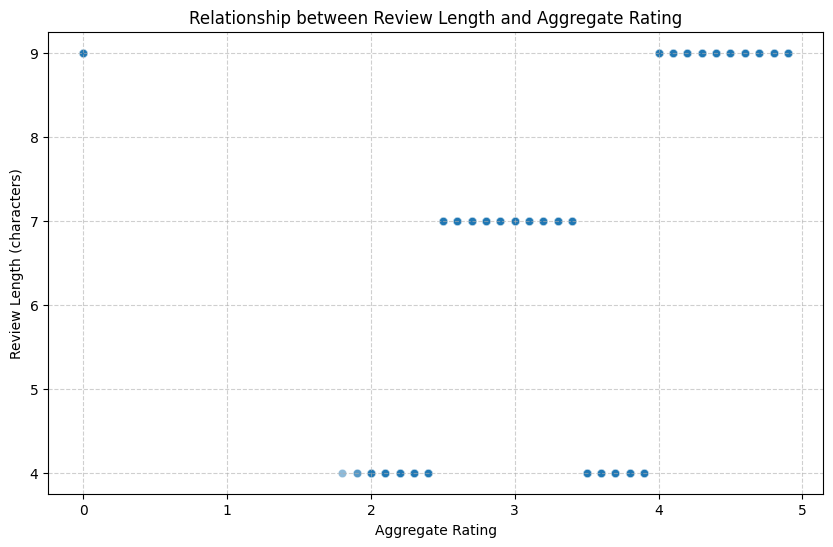

In [21]:
# 4. Visualizations
# Scatter plot to visualize relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Aggregate rating', y='Review_Length', alpha=0.5)
plt.title('Relationship between Review Length and Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Review Length (characters)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('review_length_vs_rating.png')

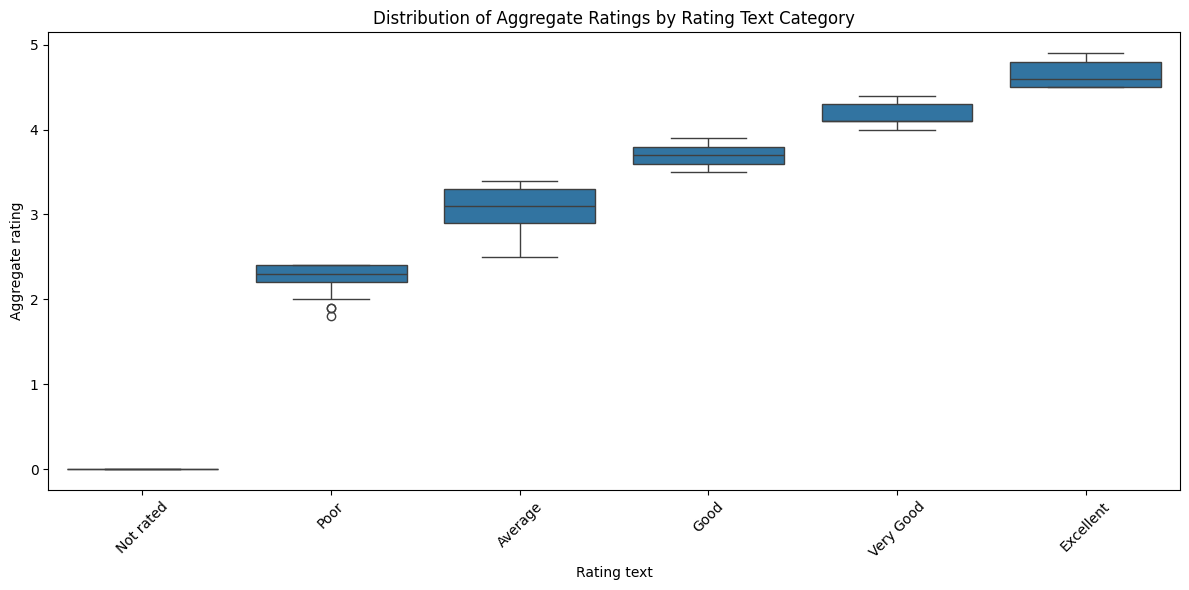

In [22]:
# Boxplot to see distribution across categories
plt.figure(figsize=(12, 6))
# Sort order based on the mean aggregate rating of each category
category_order = df.groupby('Rating text')['Aggregate rating'].mean().sort_values().index
sns.boxplot(data=df, x='Rating text', y='Aggregate rating', order=category_order)
plt.title('Distribution of Aggregate Ratings by Rating Text Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('rating_text_boxplot.png')

In [23]:
print("\nAnalysis complete. Plots saved as 'review_length_vs_rating.png' and 'rating_text_boxplot.png'.")


Analysis complete. Plots saved as 'review_length_vs_rating.png' and 'rating_text_boxplot.png'.
